### <p style="text-align: right;"> **Sean Dziubinski, Erick Olguin, Ishaan Pathak** </p>

# Group 9 - Tech 1
## Finding the Quickest Routes in East Lansing
---

In [14]:
# !conda activate ox
import sys 
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
from geopy import Nominatim # need to install>> !pip install geopy
from geopy import distance
import osmnx as ox
ox.config(log_console=True, use_cache=True)

## The Problem: Finding the Shortest Path using Dijkstra's Algorithm
---
Our goal in this project is to find the shortest path from point A to point B using Dijkstra's Shortest Path Algorithm. The problem evolved a lot as we learned more about how GPS works. When we stumbled upon Dijkstra's Algorithm, we had no prior knowledge of it or how certain navitagion apps calculated their routes. After looking at both the algorithm and Google Maps, we are able to see that Google uses the same algorithm or at least a version of Dijkstra's Algorithm in their calculations. That is where our interest came from. Our problem became difficult when we realized data for the algorithm is hard to come by in the correct form, and its even more difficult to put raw data into the correct form for the model. Next, we will show how we overcame these problems in order to make an effiecient program that solves our problem.

## The Data: Street Addresses to API's
---
<br>
Data for this project is a little different than what you'd expect. For the simple Dijkstra's Algorithm model, the data inputed is created in the notebook. For the networkx algorithm, the data used is OpenStreetMap and Google API's, while the data inputed into the functions are street addresses that get converted to coordinate points. The quality of data is high since navigation is an ongoing study and can be used everywhere, so it is current as well as dense. By dense, we mean the APIs provide a large number of nodes to work with, sometimes too many.<br>
<br>
Almost all of the data is handled by the OSMnx module of python. The OSMnx module combines the strengths of two existing python modules namely OSM (OpenStreetMap) and nx (Networkx). This module takes street data from OpenStreetMap and converts the streets into edges and the intersection points of said streets into nodes corresponding to a networkx multidigraph. This may be interpreted in layman's terms as just a scaled down version of a city's street map.<br>
<br>
OpenStreetMap provides data in the form of geojson files which are read into python using geopandas. This data provides the relative positions of all the nodes with respect to a provided central point, place or boundary. There are an assortment of functions provided by OSMnx to plot, modify, simplify and statistically analyze the networkx maps.

## The Model: Dijkstra's Shortest Path Algorithm
---

  Dijkstra's Algorithm is used in networkx to calculate the shortest path from origin to destination. Dijkstra's Algorithm is a relatively simple concept, but is difficult to write a program for. Here, we have a small-scale version of the algorithm to help get a better understanding of how it works. 
  
  Dijksta's Algorithm works closely with the graphs that we looked at in the Day-09 assignment. If you take a graph that looks like this:

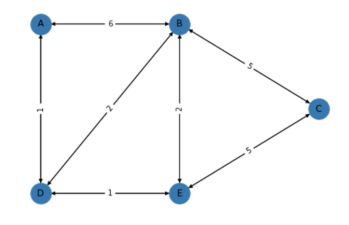

In [15]:
imgplot = plt.imshow(mpimg.imread('Initial-Graph.png')),plt.axis('off'),plt.show()

You can pick a source node to be 'A'. The goal is to find the shortest path from 'A' to every other node. To start we make a couple notes to help keep track of where we are, so our graph looks like this:

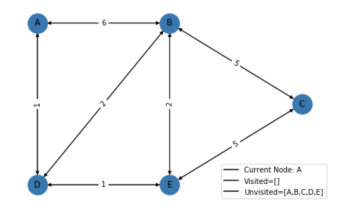

In [16]:
imgplot = plt.imshow(mpimg.imread('Graph2.png')),plt.axis('off'),plt.show()

We also keep a chart, so we can keep track of the shortest distances from A as we go through the algorithm.


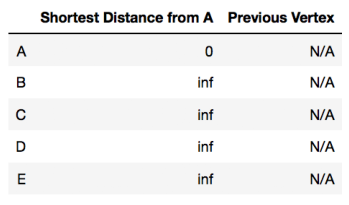

In [17]:
imgplot = plt.imshow(mpimg.imread('Chart1.png')),plt.axis('off'),plt.show()

Next, we look at the connecting neighbor nodes to 'A' and record their distance from 'A'. If their distances are less than the distance previously recorded then they take their place. The previous node, visited nodes, and unvisited nodes get updated. So we should now have:

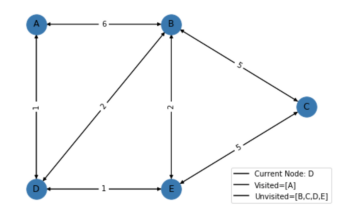

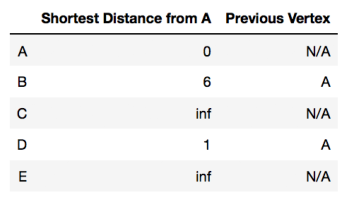

In [18]:
imgplot = plt.imshow(mpimg.imread('Graph3.png')),plt.axis('off'),plt.show()
imgplot2 = plt.imshow(mpimg.imread('Chart2.png')),plt.axis('off'),plt.show()

Now that we are done visiting 'A', we can move to the next closest node. According to the chart that is 'D'. We then repeat the process we did for 'A', but when we record the distance from 'D' to 'E' and 'D' to 'B', we have to add the distance from 'A' to 'D'. We also do not record the distance from 'D' to 'A' because we already visited 'A', and we never revisit a node. This process continues as so:

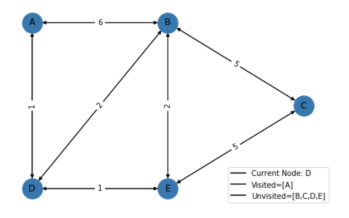

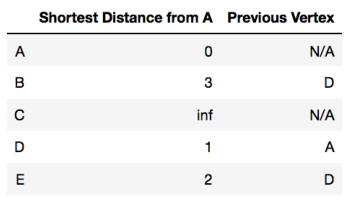

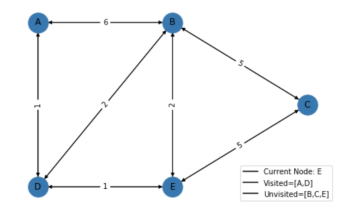

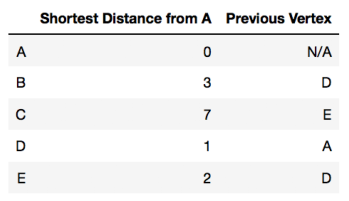

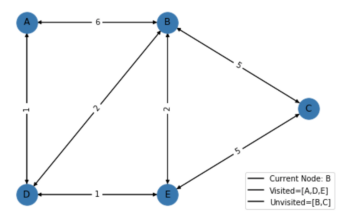

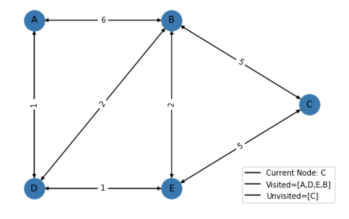

In [19]:
imgplot = plt.imshow(mpimg.imread('Graph4.png')),plt.axis('off'),plt.show()
imgplot2 = plt.imshow(mpimg.imread('Chart3.png')),plt.axis('off'),plt.show()
imgplot = plt.imshow(mpimg.imread('Graph5.png')),plt.axis('off'),plt.show()
imgplot2 = plt.imshow(mpimg.imread('Chart4.png')),plt.axis('off'),plt.show()
imgplot = plt.imshow(mpimg.imread('Graph6.png')),plt.axis('off'),plt.show()
imgplot = plt.imshow(mpimg.imread('Graph7.png')),plt.axis('off'),plt.show()

This algorithm can be written into a Python program in many ways. Our group wrote our own Dijkstra's Shortest Path Algorithm from parts of other simple programs. Ours is different in that it not only outputs the shortest distance, but gives the path too. 

In [20]:
#imports
import sys 
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
  

class Graph(): 
    #initializes graph and number of vertices
    def __init__(self, vertices): 
        self.V = vertices 
        self.graph = [[0 for column in range(vertices)]  
                    for row in range(vertices)] 
    #prints destination, distance to dest, path to dest
    def printSolution(self, dist, prevs): 
        paths = self.calc_paths(prevs)

        for p in range(len(paths)):
            paths[p].reverse()
            if p != 0:
                paths[p].append(p)
        df = pd.DataFrame([dist,paths])
        df = df.T
        df.columns = ['Distance from Origin','Path to Destination']
        print(df)
        
  
    # A utility function to find the vertex with  
    # minimum distance value, from the set of vertices  
    # not yet included in shortest path tree 
    def minDistance(self, dist, sptSet): 
  
        # Initilaize minimum distance for next node 
        min = sys.maxsize 
  
        # Search not nearest vertex not in the  
        # shortest path tree 
        for v in range(self.V): 
            if dist[v] < min and sptSet[v] == False: 
                min = dist[v] 
                min_index = v 
  
        return min_index 
    
    def calc_paths(self, prevs):
        for i in range(1,self.V):
            for j in range(self.V):
                if prevs[i][-1] !=0:
                    prevs[i].append(prevs[prevs[i][j]][0])
        
        return prevs
  
    # Funtion that implements Dijkstra's single source  
    # shortest path algorithm for a graph represented  
    # using adjacency matrix representation 
    def dijkstra(self, src): 
        dist = [sys.maxsize] * self.V 
        dist[src] = 0
        sptSet = [False] * self.V 
        prev = np.ones(self.V)*40
        prev[0] = 0
        #global paths
        prevs = list(range(self.V))
        for cout in range(self.V): 
  
            # Pick the minimum distance vertex from  
            # the set of vertices not yet processed.  
            # u is always equal to src in first iteration 
            u = self.minDistance(dist, sptSet) 
  
            # Put the minimum distance vertex in the  
            # shotest path tree 
            sptSet[u] = True
  
            # Update dist value of the adjacent vertices  
            # of the picked vertex only if the current  
            # distance is greater than new distance and 
            # the vertex in not in the shotest path tree 
            for v in range(self.V): 
                if self.graph[u][v] > 0 and sptSet[v] == False and dist[v] > dist[u] + self.graph[u][v]:
                    dist[v] = dist[u] + self.graph[u][v] 
                    prev[v] = u
        for p in range(self.V):
            prevs[p] = [int(prev[p])]
            
        
        
        self.printSolution(dist, prevs) 
        
    #draws graph
    def draw(self):
        K5 = np.matrix(self.graph)
        index = [*range(self.V)]
        for ind in index:
            str(ind)
        df2 = pd.DataFrame(K5, index=index, columns=index)
        D = nx.DiGraph(df2)
        nx.draw(D,with_labels = True)


Example of the graph from earlier going through the model:

  Distance from Origin Path to Destination
0                    0                 [0]
1                    3           [0, 3, 1]
2                    7        [0, 3, 4, 2]
3                    1              [0, 3]
4                    2           [0, 3, 4]


(None, None)

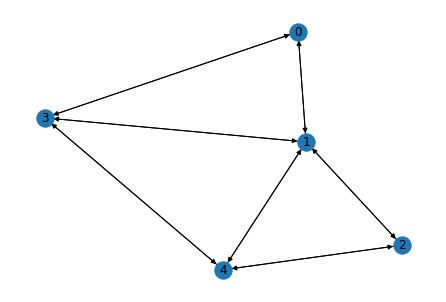

In [21]:
f = Graph(5)
matrix = [[0,6,0,1,0],
         [6,0,5,2,2],
         [0,5,0,0,5],
         [1,2,0,0,1],
         [0,2,5,1,0]]
f.graph = matrix
f.draw(),f.dijkstra(0)


Example of a slightly larger graph:

  Distance from Origin Path to Destination
0                    0                 [0]
1                    4              [0, 1]
2                   12           [0, 1, 2]
3                   19        [0, 1, 2, 3]
4                   21     [0, 7, 6, 5, 4]
5                   11        [0, 7, 6, 5]
6                    9           [0, 7, 6]
7                    8              [0, 7]
8                   14        [0, 1, 2, 8]


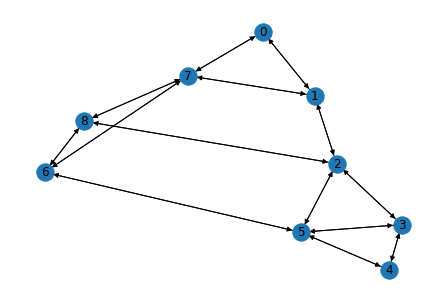

In [22]:
# Driver program 
g = Graph(9) 
g.graph = [[0, 4, 0, 0, 0, 0, 0, 8, 0], 
        [4, 0, 8, 0, 0, 0, 0, 11, 0], 
        [0, 8, 0, 7, 0, 4, 0, 0, 2], 
        [0, 0, 7, 0, 9, 14, 0, 0, 0], 
        [0, 0, 0, 9, 0, 10, 0, 0, 0], 
        [0, 0, 4, 14, 10, 0, 2, 0, 0], 
        [0, 0, 0, 0, 0, 2, 0, 1, 6], 
        [8, 11, 0, 0, 0, 0, 1, 0, 7], 
        [0, 0, 2, 0, 0, 0, 6, 7, 0] 
        ]; 
  
g.dijkstra(0),g.draw(); 

## Complexity Calculation of Dijkstra's Algorithm
---

Dijkstra's Algorithm is a very accurate algorithm to find the shortest distance between two desired nodes on a network graph. However, the way this algorithm is executed, is not always the most time efficient. Dijkstra's algorithm has a complexity of $O(V^{2})$ where V represents the number of nodes/vertices in the networkx multidigraph. Algorithm complexity is directly related to the time taken to fully execute the algorithm which means that if the number of vertices triples, the time taken to fully execute the algorithm increases nine fold.<br>
<br>
It is pretty easy for python to work with an 9 node graph similar to the one shown above as it doesn't have much of a memory requirement on the system. This changes, however, when we consider street maps of major urban center which are chock-full of nodes and edges, the time taken to fully execute the algorithm starts becoming a problem. Even a relatively small piece of the map has around 200-250 nodes in it. This marks a increase in the number of points of nearly a factor of 30 meaning, the time taken to execute the algorithm fully is affected by nearly as much as 900 times. That's an exponential increase and this solve time and this trend continues as more and more points are added to the graph. This caused a bit of a problem since we did not wish to spend a large amount of time doing the shortest path calculation, so our group decided to use the built-in Dijkstra's path calculators in networkx on top of the OSMnx data.<br>
<br>
We instead focused on making the path finding functions easy to use while also producing consistently good results. We set up the function in way that the user may enter the street addresses of their origin and destintion points instead of entering geo-location data among other additions to make the code easy to use and understand.

In [23]:
def find_location(start = [42.7320562,-84.4987390],end=[42.725153,-84.475294],trans='drive'):
    
    cp_0 = (float(end[0])-float(start[0]))/2 + float(start[0])
    cp_1 = (float(end[1])-float(start[1]))/2 + float(start[1])
    location_point = (float(cp_0),float(cp_1))
    mp_dist = float(distance.distance((float(end[1]),float(end[0])),(float(start[1]),float(start[1]))).km)

    G = ox.graph_from_point(location_point, distance=mp_dist*3, network_type='walk')
    origin_point = (float(start[0]), float(start[1]))
    destination_point = (float(end[0]), float(end[1]))
    origin_node = ox.get_nearest_node(G, origin_point)
    destination_node = ox.get_nearest_node(G, destination_point)

    # find the shortest path between origin and destination nodes
    route_SP = nx.shortest_path(G, origin_node, destination_node, weight='length')
    str(route_SP)
    
    route_D_length = nx.dijkstra_path_length(G, origin_node, destination_node,weight="length")*0.000621371
    
    route_DP = nx.dijkstra_path(G,origin_node,destination_node,weight="length")
    str(route_DP)
    route_list = [route_DP,route_SP]
    # plot the route showing origin/destination lat-long points in blue
    print("The distance between the two locations is: {} miles".format(route_D_length))
    ox.plot_graph_routes(G, route_list, fig_height=25, fig_width=20, use_geom=True)
    
    
    
def main_location(UserAgent):
    
    geolocator = Nominatim(user_agent=UserAgent,timeout=100)
    
    origin_street = input("Origin Street Address: ")
    dest_street = input("Destination  Street Address: ")

    geo_origin = geolocator.geocode(str(origin_street))
    geo_destination = geolocator.geocode(str(dest_street))

    start_loc = (geo_origin.latitude,geo_origin.longitude)
    end_loc = (geo_destination.latitude,geo_destination.longitude)
    
    trans= input("Method of transportation(Drive,Walk,Bike): ")
    trans = trans.lower()
    
    find_location(start_loc,end_loc,trans)

Origin Street Address: 410 South Magnolia Ave, Lansing, MI
Destination  Street Address: 567 Wilson Rd, East Lansing, Michigan
Method of transportation(Drive,Walk,Bike): drive
The distance between the two locations is: 2.601542432638001 miles


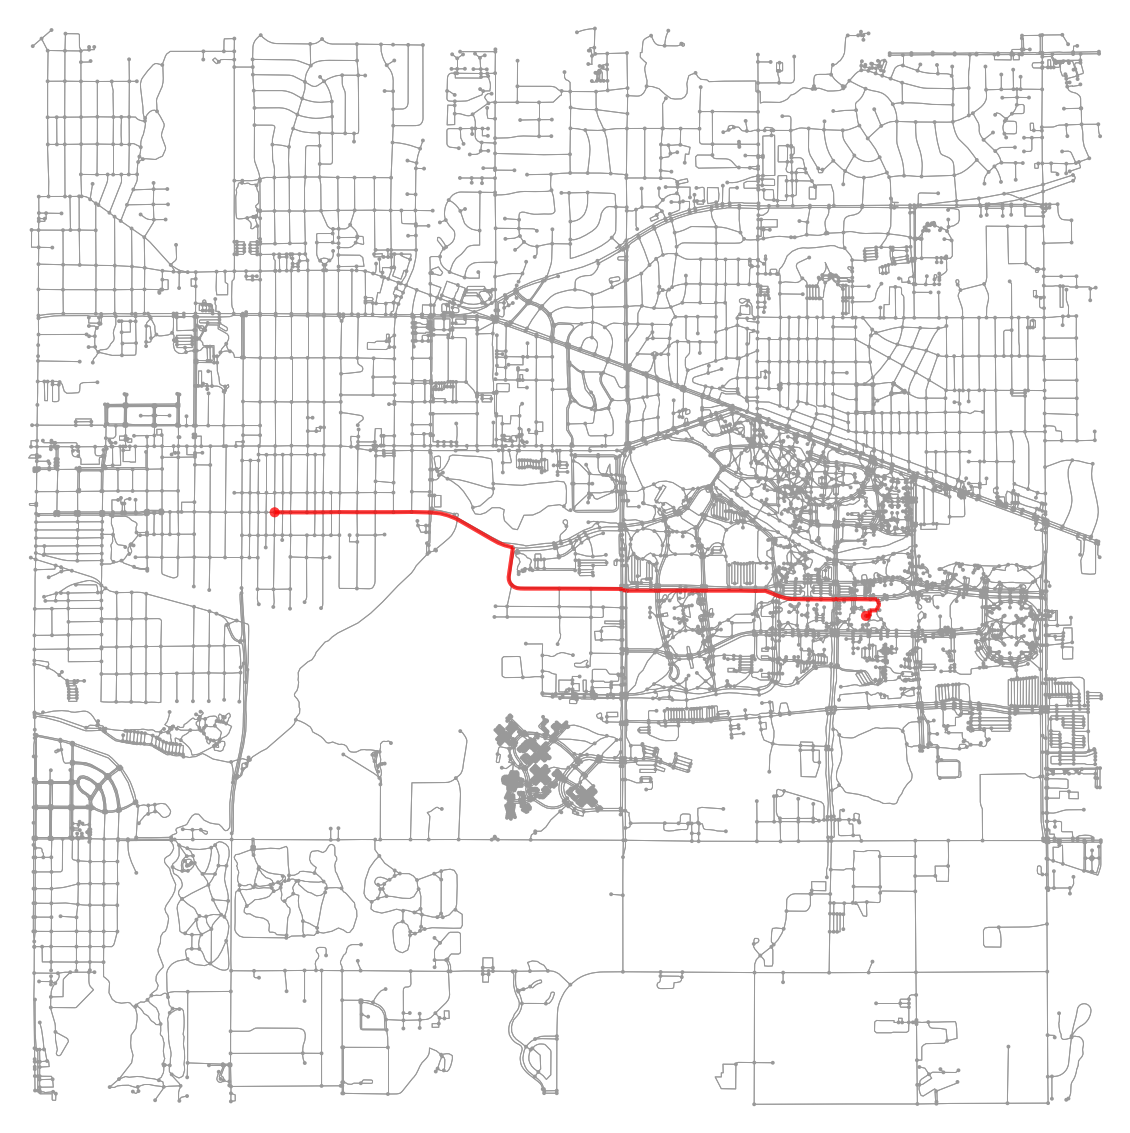

In [12]:
main_location('openstreetmap.org')
# 410 South Magnolia Ave, Lansing, MI
# 567 Wilson Rd, East Lansing, Michigan

## Testing the Model:
---

Shown below is a calculation to measure the error in the calculated Dijkstra's path as compared to the path on Google Maps which is taken as the reference.

In [24]:
y_true = 2.6
y_pred = 2.601542432638001
#Mean absolute percent error
np.mean(np.abs((y_true - y_pred) / y_true)) * 100

0.05932433223079578

## Results
---

!['Google Example'](google_maps_example.png)

Looking at what was plotted in the above graph we can see that the shortest path is exactly the same as the networkx Dijkstras path that was calculated. The map above shows that their is no true difference between shortest path function and Dijkstras path function but when compared to google maps we see that the path varies a little but the distance is still the same this has to do with google maps also following rules on the road. In this example we can see that the road is a one way which google maps accounts for but OSMNX does not. The overall trend between OSMNX and google maps was the distance being close to identical and that google maps path would sometimes be a little different.

## Conclusions
---

This project had very complex data and large files that made creating our own algorithm to read these files difficult. With a single node being added to a matrix to calculate distance the complexity increased by the square of the total number of nodes so if we had 10 nodes the algorithm would have to process 100 different paths. For this reason we had to find a library OSMNX that would help us in translating the data into nodes and edges, additionally it made running the algorithm faster.
After looking at our results we can come to the conclusion that Dijkstra's algorithm is a good algorithm at finding the shortest distance between two points by just using nodes and edges but does lack the efficency and the rules of the road. Our comparison google maps had a better implementation into finding the shortest path and has implemented a rules of the road functions that only give valid legal routes. It was interesting seeing how long it took to run the library to get the path between two locations as the Algorithm had to check all the possible ways it can get to the destination and then finding the one that had the shortest weight or length.